# Coding discussion 4
## Chau Nguyen

In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Read in the 5 txt files in the Data folder

bbc = open("../Data/bbc-khashoggi.txt").read()
aljazeera = open("../Data/aljazeera-khashoggi.txt").read()
breitbart = open("../Data/breitbart-khashoggi.txt").read()
fox = open("../Data/fox-khashoggi.txt").read()
cnn = open("../Data/cnn-khashoggi.txt").read()


In [33]:
#Create empty list for stop words
stop_words = []

In [34]:
#Define tokenize function
def tokenize(text=None):
    '''
    This function tokenize a text
    It takes one argument which is a string
    It  1) converts the everything in the string to lowercase
        2) deletes the dots
        3) turns the string into a list of seperate words in the text
        4) deletes from the text list any word that appeared in stop_words
    It returns a list of words after the str has been tokenized
    '''
    text = text.lower()
    text = text.replace('.','')
    text_list = text.split()
    text_list_final = [word for word in text_list if word not in stop_words]
    return text_list_final


In [35]:
# Test the function on the bbc article
tokenize(bbc)

['recep',
 'tayyip',
 'erdogan',
 'says',
 'many',
 'questions',
 'need',
 'to',
 'be',
 'answered',
 'the',
 'killing',
 'of',
 'journalist',
 'jamal',
 'khashoggi',
 'was',
 'planned',
 'days',
 'in',
 'advance,',
 'turkish',
 'president',
 'recep',
 'tayyip',
 'erdogan',
 'has',
 'told',
 'mps',
 'from',
 'his',
 'ruling',
 'party',
 'he',
 'said',
 'turkey',
 'had',
 'strong',
 'evidence',
 'khashoggi',
 'was',
 'killed',
 'in',
 'a',
 'premeditated',
 'and',
 '"savage"',
 'murder',
 'at',
 'the',
 'saudi',
 'consulate',
 'in',
 'istanbul',
 'on',
 '2',
 'october',
 'he',
 'also',
 'called',
 'for',
 'the',
 'suspects',
 'to',
 'be',
 'tried',
 'in',
 'istanbul',
 'he',
 'demanded',
 'saudi',
 'arabia',
 'provide',
 'answers',
 'about',
 'where',
 "khashoggi's",
 'body',
 'was,',
 'and',
 'who',
 'had',
 'ordered',
 'the',
 'operation',
 'the',
 'saudi',
 'kingdom',
 'has',
 'provided',
 'conflicting',
 'accounts',
 'of',
 'what',
 'happened',
 'to',
 'khashoggi,',
 'a',
 'us',
 'r

In [36]:
#Define my cosin function

def my_cosine(a,b):
    '''
    This function calculates the cosine of the angle between 2 vectors
    It has two input arguments - each is a vector
    It calculates the dot product between the 2 vectors divided by the product of the vectors' lengths
    (to calculate each vector's length, it takes the square root of the dot product of said vector with itself)
    The result is the cosine of the angle between the two vectors
    '''
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b))  )
    return cos




In [37]:
#Define convert_text_to_dtm function
def convert_text_to_dtm(txt):
    '''
    This function converts text into a document term matrix
    It takes one argument, which is the text
    And returns the document term matrix in a pandas dataframe
    '''
    #Creates an empty dictionary
    d = dict()
    #For each word in the tokenized list of words (using the tokenize function defined above)
    for word in tokenize(txt):
        #If the word is already the dictionary, add 1 to its value
        if word in d:
            d[word][0] += 1
        #If it's not in the dictionary, then count it as 1 (meaning count the first time it appears)
        else:
            d[word] = [1]
    #Retunrs the dictionary as a pandas dataframe
    return pd.DataFrame(d)


In [38]:
# Test the function on the bbc article
convert_text_to_dtm(bbc)


,recep,tayyip,erdogan,says,many,questions,need,to,be,answered,...,future,laid,investments,turn,"sour,",despite,mood,optimism,self-approbation,exhibited
0,2,2,9,4,4,1,1,29,7,1,...,2,1,1,1,1,1,1,1,1,1


In [39]:
#Define gen_DTM function
def gen_DTM(texts=None):
    '''
    This function generate a document term matrix
    It takes in one argument, which is the text
    It returns the document term matrix as a pandas dataframe
    '''
    # Create empty pandas dataframe
    DTM = pd.DataFrame()
    #For each text in the text input
    for text in texts:
        #Use function convert_text_to_dtm above to create entry
        entry = convert_text_to_dtm(text)
        #append each entry to the empty pandas dataframe above by row
        DTM = DTM.append(pd.DataFrame(entry),ignore_index=True,sort=True) # Row bind

    DTM.fillna(0, inplace=True) # Fill in any missing values with 0s (i.e. when a word is in one text but not another)
    return DTM


In [40]:
# Create the DTM from the 5 articles
DTM = gen_DTM([bbc,aljazeera,breitbart,fox,cnn])

#Rename the rows based on the article input for DTM
DTM.index = ["bbc","aljazeera","breitbart","fox","cnn"]

#Print it out
DTM

,"""a","""all","""assassination","""be","""bring","""co-operator""","""distinction""","""everything","""fist-fight""","""fistfight""",...,“may,“other,“partner,“putting,“saudi,“the,“to,“we,“we're,“why
bbc,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aljazeera,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
breitbart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0
fox,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
cnn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#Test my_cosine with DTM after renaming the index
my_cosine(DTM.loc["bbc"],DTM.loc["fox"])


0.8868691475115703

In [42]:
#Create empty pd dataframe with index and columns similar to DTM
DTM_corr = pd.DataFrame(index = (["bbc","aljazeera","breitbart","fox","cnn"]),columns = (["bbc","aljazeera","breitbart","fox","cnn"]))

#Print it out
DTM_corr


,bbc,aljazeera,breitbart,fox,cnn
bbc,NaN,NaN,NaN,NaN,NaN
aljazeera,NaN,NaN,NaN,NaN,NaN
breitbart,NaN,NaN,NaN,NaN,NaN
fox,NaN,NaN,NaN,NaN,NaN
cnn,NaN,NaN,NaN,NaN,NaN


In [43]:
# Create a correlation matrix between the 5 articles
# by inserting the cosine similarities into the corresponding cell

for i in ["bbc","aljazeera","breitbart","fox","cnn"]:
    for j in ["bbc","aljazeera","breitbart","fox","cnn"]:
        # Each cell of the correlation matrix is the cosine of the angle between the 2 vectors in DTM based on the vector name
        DTM_corr.loc[i,j] = my_cosine(DTM.loc[i], DTM.loc[j])


In [44]:
#Print out correlation matrix
DTM_corr


,bbc,aljazeera,breitbart,fox,cnn
bbc,1,0.862252,0.891241,0.886869,0.745456
aljazeera,0.862252,1,0.82485,0.832189,0.730518
breitbart,0.891241,0.82485,1,0.86899,0.683575
fox,0.886869,0.832189,0.86899,1,0.743866
cnn,0.745456,0.730518,0.683575,0.743866,1


In [45]:
#Convert DTM_corr to float to use with heatmap in next step
DTM_corr = DTM_corr.astype(float)



## Similarities between articles when no stop words are removed

<AxesSubplot:title={'center':"Heatmap of cosine similaries between articles on Khashoggi's killing before any stop words are removed"}>

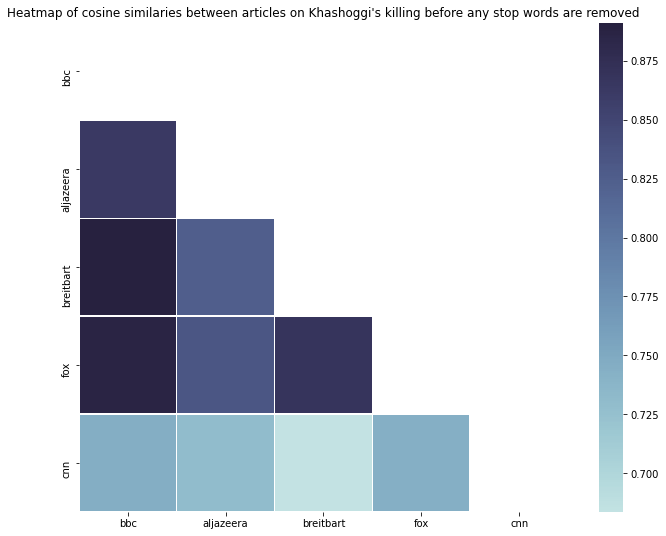

In [49]:
#Create a heatmap from the correlation matrix, masking the top half of the heatmap

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(DTM_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set title
ax.set_title("Heatmap of cosine similaries between articles on Khashoggi's killing before any stop words is removed")

# Generate a colormap
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

# Draw the heatmap with the mask and set vmax and vmin according to DTM_corr
sns.heatmap(DTM_corr,mask=mask, cmap=cmap,
            square=True, linewidths=.5)


Observation: The BBC article has more similarities to the articles from Breitbart, FOX and Al Jazeera than CNN - even though we tend to think of CNN and BBC to be closer to each other on the political spectrum. The CNN article has the least similary with any other article. Fox and Breibart are quite close to each other, but not as close as BBC to each of them. 

Next, I will check for similarities after removing the stop words

In [63]:
# Now, read in the stop word from csv file, append the empty list created above
with open("../Data/stop_words.csv", newline='') as file:
    for row in csv.reader(file):
        stop_words.append(row[0])


In [64]:
#Redefine tokenize function, now with stop words
def tokenize(text=None):
    '''
    This function tokenize a text
    It takes one argument which is a string
    It  1) converts the everything in the string to lowercase
        2) deletes the dots
        3) turns the string into a list of seperate words in the text
        4) deletes from the text list any word that appeared in stop_words
    It returns a list of words after the str has been tokenized
    '''
    text = text.lower()
    text = text.replace('.','')
    text_list = text.split()
    text_list_final = [word for word in text_list if word not in stop_words]
    return text_list_final

In [65]:
# Create document term matrix with tokenized article
DTM_stop = gen_DTM([bbc,aljazeera,breitbart,fox,cnn])

#Rename the rows based on the article input for DTM_stop
DTM_stop.index = ["bbc","aljazeera","breitbart","fox","cnn"]

#Create empty pd dataframe with index and columns similar to DTM_corr
DTM_stop_corr = pd.DataFrame(index = (["bbc","aljazeera","breitbart","fox","cnn"]),columns = (["bbc","aljazeera","breitbart","fox","cnn"]))

# Create a correlation matrix between the 5 articles after stop words are removed
for i in ["bbc","aljazeera","breitbart","fox","cnn"]:
    for j in ["bbc","aljazeera","breitbart","fox","cnn"]:
        # Each cell of the correlation matrix is the cosine of the angle between the 2 vectors in DTM based on the vector name
        DTM_stop_corr.loc[i,j] = my_cosine(DTM_stop.loc[i], DTM_stop.loc[j])


In [66]:
# Convert DTM_stop_corr to all floats
DTM_stop_corr = DTM_stop_corr.astype(float)

# Print it out
DTM_stop_corr

,bbc,aljazeera,breitbart,fox,cnn
bbc,1.000000,0.636264,0.533582,0.574735,0.470131
aljazeera,0.636264,1.000000,0.525267,0.603883,0.500149
breitbart,0.533582,0.525267,1.000000,0.495539,0.325097
fox,0.574735,0.603883,0.495539,1.000000,0.490545
cnn,0.470131,0.500149,0.325097,0.490545,1.000000


## Similarities between articles when no stop words are removed

<AxesSubplot:title={'center':"Heatmap of cosine similaries between articles on Khashoggi's killing after stop words are removed"}>

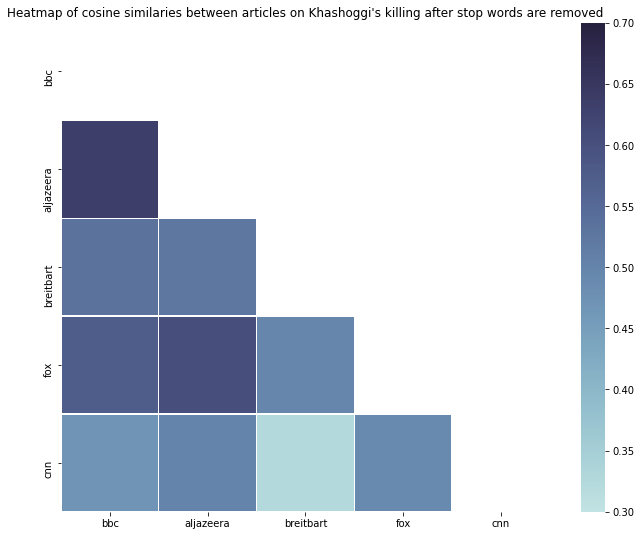

In [67]:
#Create a heatmap from the correlation matrix with stop words removed, masking the top half of the heatmap

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(DTM_stop_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set title
ax.set_title("Heatmap of cosine similaries between articles on Khashoggi's killing after stop words are removed")

# Generate a colormap
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

# Draw the heatmap with the mask and set vmax and vmin according to DTM_corr
sns.heatmap(DTM_stop_corr,mask=mask, cmap=cmap, vmax = 0.7, vmin = 0.3,
            square=True, linewidths=.5)



Observation: After stop words are removed from the 5 articles, the CNN article is still very dissimilar to the Breibart article. The BBC article and Al Jazeera articles are closest to each other. Surprisingly, FOX seem to have more similarities with Al Jazeera and BBC than with Breitbart. 